In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [14]:
centeroid=[[-5,-5],[5,5]]
X,y=make_blobs(n_samples=100,n_features=2,cluster_std=[1,1],random_state=2,centers=centeroid)

In [15]:
X

array([[-5.3135082 , -4.22898826],
       [-5.65325027, -4.15754372],
       [-4.49711858, -6.24528809],
       [-4.30488039, -7.03346655],
       [ 5.36505352,  5.77408203],
       [-5.26905696, -2.76863321],
       [-7.1361961 , -3.35972919],
       [ 5.79918   ,  6.26261366],
       [-7.04032305, -4.95374448],
       [ 5.39652016,  4.68538256],
       [ 6.11788673,  4.72575791],
       [ 9.10869262,  5.82112088],
       [-4.49814279, -5.8442137 ],
       [ 5.61014409,  5.4234969 ],
       [ 3.54663565,  4.66198222],
       [ 6.53176032,  3.01415423],
       [ 4.67495037,  4.43976549],
       [-4.17529699, -3.75178708],
       [-5.46200535, -4.64911151],
       [-5.67767558, -6.43943903],
       [-3.63276458, -3.78211437],
       [-4.61813377, -4.43372456],
       [ 4.77175244,  2.93038774],
       [-4.44854596, -2.70779199],
       [ 5.96078194,  5.75837035],
       [-5.0191305 , -3.82499878],
       [ 4.53165374,  3.74527969],
       [-6.42121723, -5.1534952 ],
       [-5.38151648,

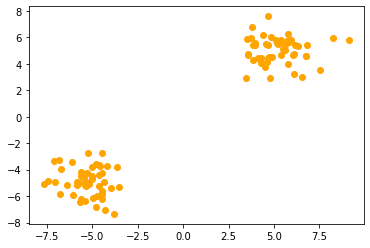

In [16]:
plt.scatter(X[:,0],X[:,1],color="orange")

In [17]:
import random
class Kmeans:
  def __init__(self,n_clusters=2,max_iterations=100):
    self.max_iterations=max_iterations
    self.n_clusters=n_clusters
    self.centeroids=None
  
  def fit_predict(self,X):
    random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centeroids=X[random_index]
    
    for i in range(self.max_iterations):
      cluster_group=self.assign_clusters(X)
      old_centeroids=self.centeroids
      self.centeroids=self.move_centeroid(X,cluster_group)

      if(old_centeroids==self.centeroids).all():
        break
    
    return cluster_group
  
  
  def assign_clusters(self,X):
    cluster_group=[]
    distances=[]


    for row in X:
      for centeroid in self.centeroids:
        distances.append(np.sqrt(np.dot(row-centeroid,row-centeroid)))
      min_distances=min(distances)
      index_pos=distances.index(min_distances)
      cluster_group.append(index_pos)
      distances.clear()
    
    return np.array(cluster_group)
  

  def move_centeroid(self,X,cluster_group):
    new_centeoid=[]
    cluster_type=np.unique(cluster_group)
    for type in cluster_type:
      new_centeoid.append((((X[cluster_group==type].mean(axis=0)))))
    
    return np.array(new_centeoid)
    



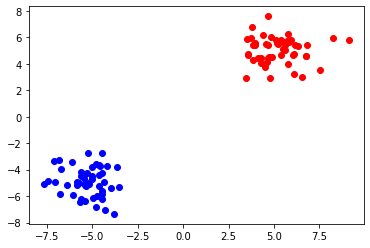

In [18]:

km=Kmeans()
y_mean=km.fit_predict(X)
plt.scatter(X[y_mean==0,0],X[y_mean==0,1],color="red")
plt.scatter(X[y_mean==1,0],X[y_mean==1,1],color="blue")